dataset에서 결측치 위치 확인

In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "A" : [5, 4, np.nan, 2, 1],
    'B' : [np.nan, np.nan, 8, 7, 6],
    "C" : [15, 14, 13, 12, np.nan]
})

print(data)

     A    B     C
0  5.0  NaN  15.0
1  4.0  NaN  14.0
2  NaN  8.0  13.0
3  2.0  7.0  12.0
4  1.0  6.0   NaN


결측치 위치 확인

In [2]:
print(data.isnull())

       A      B      C
0  False   True  False
1  False   True  False
2   True  False  False
3  False  False  False
4  False  False   True


In [31]:
import seaborn as sns
import random
def init_data(n, m):
    res = {}
    c =0
    for i in range(n):
        arr = []
        for j in range(m):
            p = random.random()
            c+=1
            if p>0.5 :
                arr.append(c)
            else :
                arr.append(np.nan)
        print(arr)
        res[chr(int(hex(65+i), 16))] = arr
    return res



hit_d = pd.DataFrame(init_data(3, 5))

[nan, nan, 3, nan, 5]
[6, 7, 8, nan, 10]
[nan, 12, nan, nan, 15]


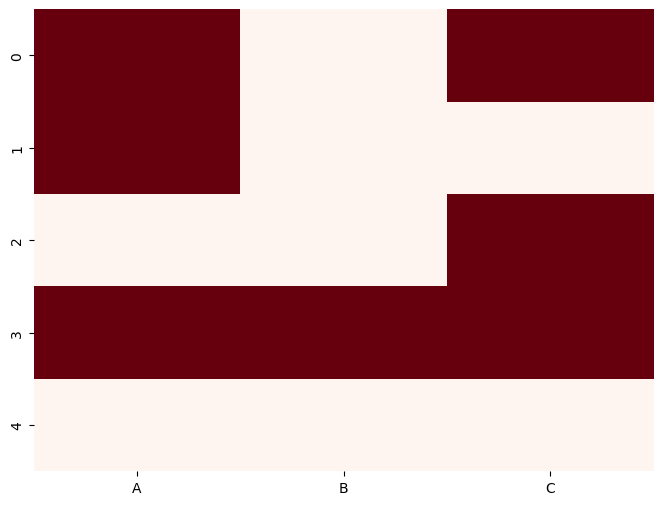

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(hit_d.isnull(), cmap='Reds', cbar=False)
plt.show()

Time series data pre-process

In [37]:
dates = pd.date_range(start="2023-01-01", periods=500, freq="D")
values = np.random.randn(500)

values[30] = np.nan
values[497] = np.nan

data = pd.DataFrame({
    "dates" : dates,
    "values" : values
})

row = data.iloc[30]
print(row)

dates     2023-01-31 00:00:00
values                    NaN
Name: 30, dtype: object


In [38]:
tunced = data.dropna(axis=0)

print(len(tunced))

498


In [41]:
dates = pd.date_range(start="2023-01-01", periods=10, freq="D")
values = [1, np.nan, np.nan, 4, np.nan, 6, 7, np.nan, 9, 10]

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

In [42]:
data['Val_linear'] = data["Value"].interpolate(method='linear')
print(data)

        Date  Value  Val_linear
0 2023-01-01    1.0         1.0
1 2023-01-02    NaN         2.0
2 2023-01-03    NaN         3.0
3 2023-01-04    4.0         4.0
4 2023-01-05    NaN         5.0
5 2023-01-06    6.0         6.0
6 2023-01-07    7.0         7.0
7 2023-01-08    NaN         8.0
8 2023-01-09    9.0         9.0
9 2023-01-10   10.0        10.0


(array([19358., 19359., 19360., 19361., 19362., 19363., 19364., 19365.,
        19366., 19367.]),
 [Text(19358.0, 0, '2023-01-01'),
  Text(19359.0, 0, '2023-01-02'),
  Text(19360.0, 0, '2023-01-03'),
  Text(19361.0, 0, '2023-01-04'),
  Text(19362.0, 0, '2023-01-05'),
  Text(19363.0, 0, '2023-01-06'),
  Text(19364.0, 0, '2023-01-07'),
  Text(19365.0, 0, '2023-01-08'),
  Text(19366.0, 0, '2023-01-09'),
  Text(19367.0, 0, '2023-01-10')])

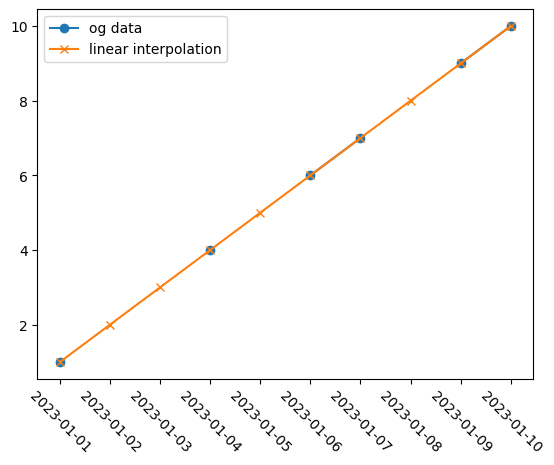

In [44]:
plt.plot(data['Date'], data['Value'], 'o-', label='og data')
plt.plot(data['Date'], data['Val_linear'], 'x-', label='linear interpolation')
plt.legend()
plt.xticks(rotation=-45)

In [45]:
from scipy.interpolate import CubicSpline

dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.rand(1000)



In [46]:
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

data.loc[100:200, 'Value'] = np.nan

In [48]:
data['Value_filled'] = data["Value"].interpolate(method="linear")

In [51]:
csp = CubicSpline(data.index,data["Value_filled"])
data["Value_spline"] = csp(data.index)


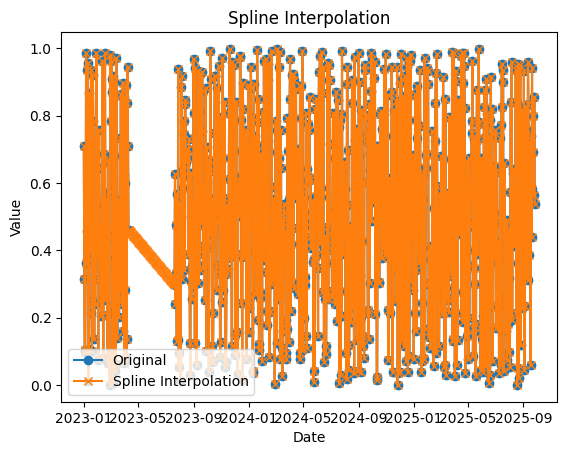

In [52]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()


### 스플라인 보간법 -> 연속성 있는 데이터에서 적용됩니다. !! 결측값제거하거나 다른 방법으로 대처 하시고 진행해야합니다.

In [58]:
data = pd.DataFrame({
    "Date":dates,
    "Value":values
})

data.loc[50:200, 'Value'] = np.nan
data['Value_filled'] = data["Value"].interpolate(method="linear")

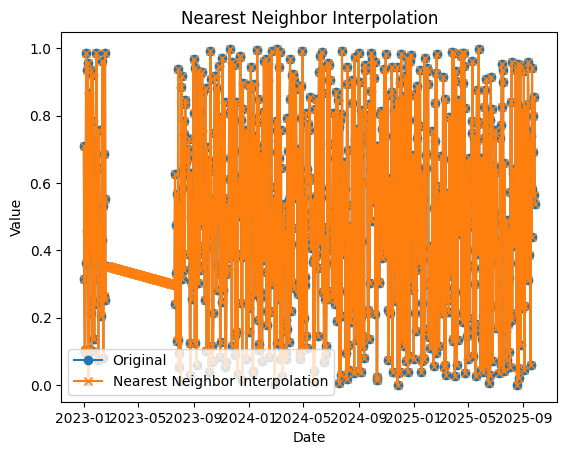

In [59]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()
plt.show()

Prac) Replace NaN in time series data to average and visualize

In [69]:
data = pd.DataFrame({
    "Date":dates,
    "Value":values,
    'value temp':np.zeros(1000)
})

data.loc[50:150, "Value"] = np.nan



#10 using ARIMA model) 결측치 prediction and reaction 

In [70]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Value"].dropna(), order=(1, 1, 1))
model_fit = model.fit()

predicted = model_fit.predict(start=50, end=2000)
print(predicted)
data.loc[50:150, "value temp"] = predicted

c:\Users\acens\miniconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


50      0.481251
51      0.473073
52      0.472694
53      0.472964
54      0.485517
          ...   
1996    0.512770
1997    0.512770
1998    0.512770
1999    0.512770
2000    0.512770
Name: predicted_mean, Length: 1951, dtype: float64


c:\Users\acens\miniconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\acens\miniconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


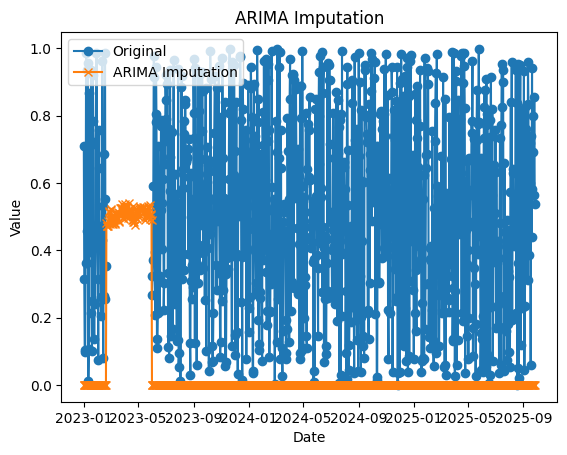

In [73]:
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['value temp'], 'x-', label='ARIMA Imputation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Imputation')
plt.legend()
plt.show()